<font size=7>Alpha Waves Figure

# <font color="gray"> Setup

This is where I create the various plots used to make the alpha waves figure in the paper.

In [1]:
from human_hip.histology import plot_histology, plot_histology_electrode_map
from human_hip.spike_data import read_phy_files, read_autocurated_data
from human_hip.raw_data import  get_brain_waves

import numpy as np
import pickle

In [2]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/acid1_start9s_stop28s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
print(data_raw.keys())
print(data_raw["data"].shape)

dict_keys(['data', 'xy', 'frame_rate'])
(1009, 19000)


In [3]:
electrode_mapping = data_raw["xy"].copy()
electrode_mapping[:,1] = data_raw["xy"][:,0]/12.5
electrode_mapping[:,0] = data_raw["xy"][:,1]

In [4]:
sd = read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [5]:
data_raw["xy"].shape

(1009, 2)

In [6]:
data_raw["data"].shape

(1009, 19000)

In [7]:
data_raw["frame_rate"]

1000.0

In [8]:
my_electrodes = [630, 19, 656]

# Plot Electrodes

In [11]:
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

Text(0.5, 1.0, 'Neuron & Electrode Layout')

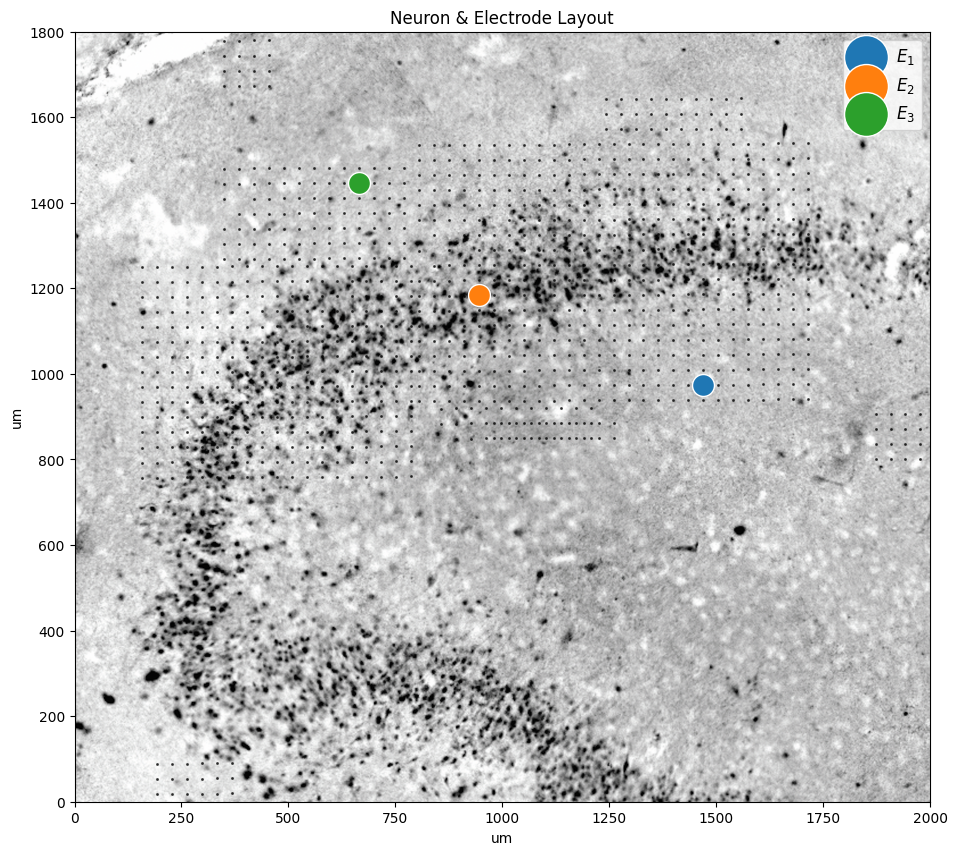

In [12]:
# Add background image
plt.figure(figsize=(15,10))       # Set image size to roughly the shape of the MEA
img = plt.imread(image_path)      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions
plt.scatter( electrode_mapping[:,0], electrode_mapping[:,1], s=1.4, c="black", alpha=.6) # Plot electrodes

# Add selected electrodes
plt.scatter( electrode_mapping[658,0], electrode_mapping[658,1], s=250, edgecolors='white', label='$E_1$' )
plt.scatter( electrode_mapping[19,0], electrode_mapping[19,1], s=250, edgecolors='white', label='$E_2$' )
plt.scatter( electrode_mapping[515,0], electrode_mapping[515,1], s=250, edgecolors='white', label='$E_3$' )

# Add legend, adjust axis limits, labels, and title
plt.legend(fontsize='large', markerscale=2)
plt.xlim(0, 2000)
plt.ylim(0, 1800)
plt.xlabel('um')
plt.ylabel('um')
plt.title(f"Neuron & Electrode Layout")
#plt.show()

Text(0.5, 1.0, 'Neuron & Electrode Layout')

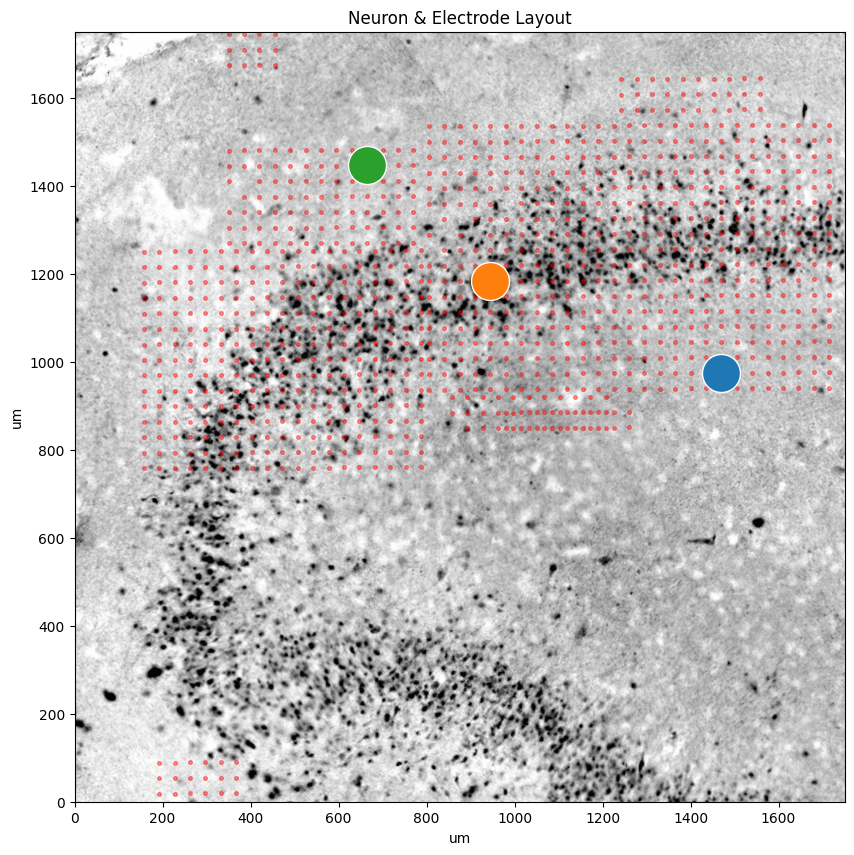

In [24]:

# Add background image
plt.figure(figsize=(15,10))       # Set image size to roughly the shape of the MEA
img = plt.imread("/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions
plt.scatter( electrode_mapping[:,0], electrode_mapping[:,1], s=7, c="red", alpha=.4) # Plot electrodes

# Add selected electrodes

plt.scatter( electrode_mapping[658,0], electrode_mapping[658,1], s=750, edgecolors='white', label='$E_1$' )
plt.scatter( electrode_mapping[19,0], electrode_mapping[19,1], s=750, edgecolors='white',  label='$E_2$' )
plt.scatter( electrode_mapping[515,0], electrode_mapping[515,1], s=750, edgecolors='white',  label='$E_3$' )

# #add legend, axises limits, labels,  and title
# #legend_elements = [Patch(facecolor=electrode_color) ]   # Create colors in legend
# #plt.legend(legend_elements, ["Electrode"])       # Add legend       
# plt.legend()
plt.xlim(0,1750)                                      # Set axis limits to that of the MEA
plt.ylim(0, 1750)
plt.xlabel('um')                                         # add axises and title
plt.ylabel('um')
plt.title(f"Neuron & Electrode Layout")
# #plt.show()  

In [ ]:
plot_histology_electrode_map( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
                              red_electrodes=  [515, 19, 658], #377], #list(range(630,631)) ,
                              electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )

In [16]:
waves = get_brain_waves( data_raw["data"],fs=data_raw["frame_rate"])

Text(0, 0.5, 'Amplitude')

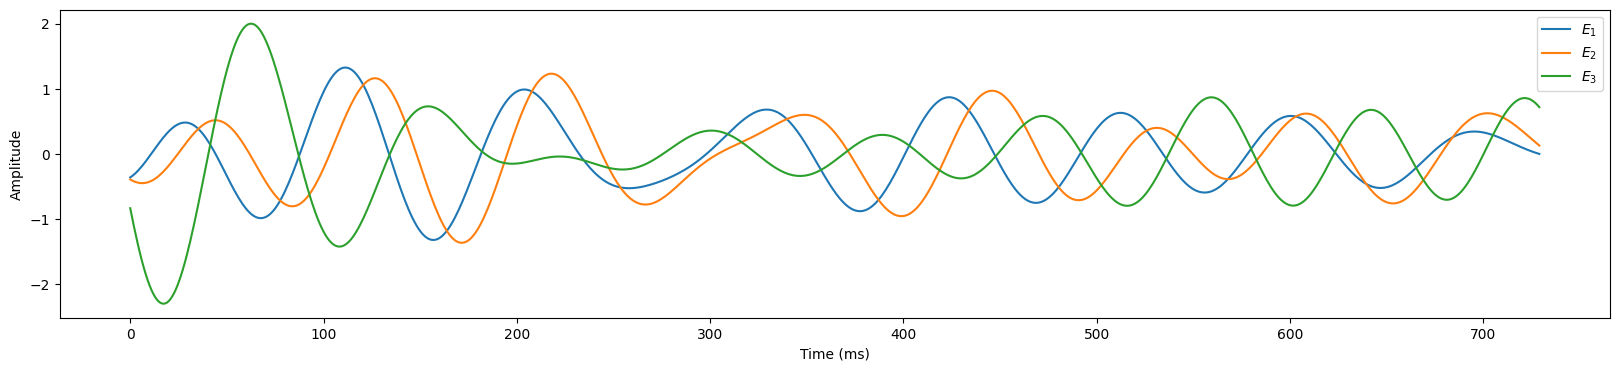

In [21]:
plt.figure(figsize=(20,4))
plt.plot( waves["alpha"][658,5770:6500], label='$E_1$' )
plt.plot( waves["alpha"][19,5770:6500], label='$E_2$' )
plt.plot( waves["alpha"][515,5770:6500], label='$E_3$' )

# Adding a legend
plt.legend()

# Additional plot customization
plt.xlabel('Time (ms)')  # Adjust label as appropriate
plt.ylabel('Amplitude')         # Adjust label as appropriate
# plt.title('Wave Intensity at Different Indexes')  # Optional: add a plot title
# plt.show()


# <font color="red">Old

In [ ]:
plot_histology_electrode_map( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
                              red_electrodes=  [515, 19, 658], #377], #list(range(630,631)) ,
                              electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )

In [ ]:



def plot_histology_electrode_map(sd, electrode_mapping, image_path, red_electrodes=[], electrode_color="darkorange", electrodes=True, xlim=(0, 3850), ylim=(0, 2100) ):
    """
    Function: Plots histology image with electrodes and neurons overlaid.
    Inputs: 
        sd (SpikeData object): contains the metadata necessary to plot the neurons and electrodes
        image_path (string): path to histology image
        electrodes (True/False): Whether or not to plot electrodes
        neurons (True/Fasle): Whether or not to plot neurons
        neurons (True/Fasle): Whether or not to plot neurons
        xlim, ylim (tuple): x and y limits of the plot. Defaults to the dimensions of the MEA
    Outputs:
        Displays a plot of the histology image with electrodes and neurons overlaid
    """
                                                
    # Add background image
    plt.figure(figsize=(15,10))       # Set image size to roughly the shape of the MEA
    img = plt.imread(image_path)      # Load in image
    plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions

    # Plot electrodes
    if electrodes:        # Get electrode positions from metadata, the plot them
        plt.scatter( electrode_mapping[:,0], electrode_mapping[:,1], s=4, c=electrode_color)

    for electrode_num in red_electrodes:
        plt.scatter( electrode_mapping[electrode_num,0], electrode_mapping[electrode_num,1], s=20, c="red")

    #add legend, axises limits, labels,  and title
    legend_elements = [Patch(facecolor=electrode_color) ]   # Create colors in legend
    plt.legend(legend_elements, ["Electrode"])       # Add legend       
    plt.xlim( xlim[0], xlim[1] )                                       # Set axis limits to that of the MEA
    plt.ylim( ylim[0], ylim[1])
    plt.xlabel('um')                                         # add axises and title
    plt.ylabel('um')
    plt.title(f"Neuron & Electrode Layout")
    plt.show()  

In [201]:
# Find electrodes gephgraphically close to selected electrode
location= electrode_mapping[499,:]

electrodes = []
for i in range(len(electrode_mapping)):
    dist = np.linalg.norm( electrode_mapping[i,:] - location)
    if dist<50:
        electrodes.append(i)
electrodes

In [61]:
# plot_histology_electrode_map( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
#                               red_electrodes=  [499, 19, 658], #list(range(630,631)) ,
#                               electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )

In [62]:
# plot_histology_electrode_map( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
#                               red_electrodes=  [515, 19, 658], #list(range(630,631)) ,
#                               electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )

In [63]:
# plot_histology_electrode_map( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
#                               red_electrodes=  [138, 19, 658], #list(range(630,631)) ,
#                               electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )

In [64]:
# plot_histology_electrode_map( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
#                               red_electrodes=  [410, 19, 658], #list(range(630,631)) ,
#                               electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )

In [65]:
# plot_histology_electrode_map( sd, electrode_mapping,  "/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
#                               red_electrodes=  [515, 19, 658], #list(range(630,631)) ,
#                               electrode_color="lime", xlim=(0,2000),ylim=(0, 1800)  )